In [84]:
# import pandas and geopandas for visualizations
import pandas as pd 
import geopandas as gpd


In [85]:
muni = pd.read_csv('Muni_Stops_20250126.csv')

In [86]:
muni.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3285 entries, 0 to 3284
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   OBJECTID                      3285 non-null   int64  
 1   STOPNAME                      3285 non-null   object 
 2   TRAPEZESTOPABBR               3285 non-null   object 
 3   RUCUSSTOPABBR                 2930 non-null   object 
 4   STOPID                        3285 non-null   int64  
 5   LATITUDE                      3285 non-null   float64
 6   LONGITUDE                     3285 non-null   float64
 7   ACCESSIBILITYMASK             657 non-null    float64
 8   ATSTREET                      3194 non-null   object 
 9   ONSTREET                      3274 non-null   object 
 10  POSITION                      2922 non-null   object 
 11  ORIENTATION                   2944 non-null   object 
 12  SERVICEPLANNINGSTOPTYPE       1646 non-null   object 
 13  SHE

In [87]:
tracts.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Current Supervisor Districts  11 non-null     object
 1   sup_dist_name                 11 non-null     object
 2   sup_name                      11 non-null     object
dtypes: object(3)
memory usage: 396.0+ bytes


In [88]:
muni.head()

,OBJECTID,STOPNAME,TRAPEZESTOPABBR,RUCUSSTOPABBR,STOPID,LATITUDE,LONGITUDE,ACCESSIBILITYMASK,ATSTREET,ONSTREET,...,SIGNUPID,SUPERVISOR_DISTRICT,shape,data_as_of,data_loaded_at,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Neighborhoods,SF Find Neighborhoods
0,72869,17th St&Noe St *-MI,17ST.NO0,17ST.NOE,3318,37.762645,-122.432991,NaN,NOE ST,17TH ST,...,147,8.0,POINT (-122.432991 37.762645),11/02/2024 08:47:21 PM,11/04/2024 09:42:39 AM,3.0,5.0,5.0,38.0,38.0
1,73624,Judah St&12th Ave NE-NS/SI,JUDA12A0,JUDA12AV,5195,37.762069,-122.469324,1.0,12TH AVE,JUDAH ST,...,147,7.0,POINT (-122.469324 37.762069),11/02/2024 08:47:21 PM,11/04/2024 09:42:39 AM,10.0,11.0,14.0,109.0,109.0
2,73681,Mansell St&Somerset St S-NS/PS,MANSSOM0,MANSSOME,5351,37.720418,-122.405094,NaN,SOMERSET ST,MANSELL ST,...,147,9.0,POINT (-122.405094 37.720418),11/02/2024 08:47:21 PM,11/04/2024 09:42:39 AM,2.0,9.0,25.0,75.0,75.0
3,74029,Mission St&Sickles Ave W-FS/BZ,MISSSIC0,MISSSICK,5619,37.708660,-122.453320,NaN,SICKLES AVE,MISSION ST,...,147,11.0,POINT (-122.45332 37.70866),11/02/2024 08:47:21 PM,11/04/2024 09:42:39 AM,9.0,1.0,28.0,66.0,66.0
4,75912,Ulloa St&14th Ave SW-NS/PS,ULOA14S1,ULOA14AV,8137,37.741356,-122.470211,NaN,14TH AVE,ULLOA ST,...,147,7.0,POINT (-122.470211 37.741356),11/02/2024 08:47:21 PM,11/04/2024 09:42:39 AM,10.0,8.0,41.0,46.0,46.0


In [112]:
muni['Current Supervisor Districts'] = muni['Current Supervisor Districts'].astype(object)
muni.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3285 entries, 0 to 3284
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   OBJECTID                      3285 non-null   int64  
 1   STOPNAME                      3285 non-null   object 
 2   TRAPEZESTOPABBR               3285 non-null   object 
 3   RUCUSSTOPABBR                 2930 non-null   object 
 4   STOPID                        3285 non-null   int64  
 5   LATITUDE                      3285 non-null   float64
 6   LONGITUDE                     3285 non-null   float64
 7   ACCESSIBILITYMASK             657 non-null    float64
 8   ATSTREET                      3194 non-null   object 
 9   ONSTREET                      3274 non-null   object 
 10  POSITION                      2922 non-null   object 
 11  ORIENTATION                   2944 non-null   object 
 12  SERVICEPLANNINGSTOPTYPE       1646 non-null   object 
 13  SHE

In [114]:
# read census tracts datafile
tracts=gpd.read_file('Supervisor Districts (2022)_20250126.geojson')
tracts.head()

,sup_dist_pad,sup_dist_num,sup_dist_name,data_loaded_at,sup_name,sup_dist,data_as_of,geometry
0,01,1.0,SUPERVISORIAL DISTRICT 1,2025-01-08 18:30:00,Connie Chan,1,2025-01-08 18:30:00,"MULTIPOLYGON (((-122.4852 37.7902, -122.48484 ..."
1,02,2.0,SUPERVISORIAL DISTRICT 2,2025-01-08 18:30:00,Stephen Sherrill,2,2025-01-08 18:30:00,"MULTIPOLYGON (((-122.47695 37.81098, -122.4766..."
2,03,3.0,SUPERVISORIAL DISTRICT 3,2025-01-08 18:30:00,Danny Sauter,3,2025-01-08 18:30:00,"MULTIPOLYGON (((-122.41972 37.81113, -122.4195..."
3,04,4.0,SUPERVISORIAL DISTRICT 4,2025-01-08 18:30:00,Joel Engardio,4,2025-01-08 18:30:00,"MULTIPOLYGON (((-122.51103 37.77056, -122.5110..."
4,05,5.0,SUPERVISORIAL DISTRICT 5,2025-01-08 18:30:00,Bilal Mahmood,5,2025-01-08 18:30:00,"MULTIPOLYGON (((-122.42706 37.78879, -122.4254..."


<Axes: >

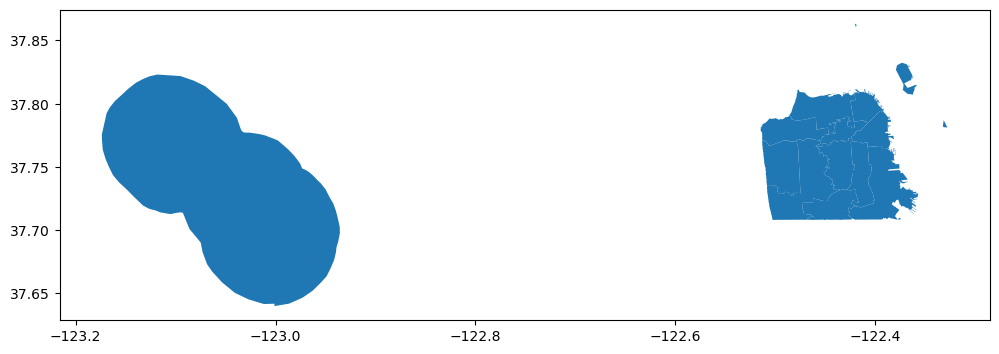

In [115]:

tracts.plot(figsize=(12,10))

In [116]:
# filtering for the columns I want to see
tracts = tracts[['sup_dist_num', 'sup_dist_name', 'sup_name', ]]
tracts.head()

,sup_dist_num,sup_dist_name,sup_name
0,1.0,SUPERVISORIAL DISTRICT 1,Connie Chan
1,2.0,SUPERVISORIAL DISTRICT 2,Stephen Sherrill
2,3.0,SUPERVISORIAL DISTRICT 3,Danny Sauter
3,4.0,SUPERVISORIAL DISTRICT 4,Joel Engardio
4,5.0,SUPERVISORIAL DISTRICT 5,Bilal Mahmood


In [119]:
# renaming GEOID to FIPS
tracts = tracts.rename(columns={'sup_dist_num': 'Current Supervisor Districts'})
tracts.head()

,Current Supervisor Districts,sup_dist_name,sup_name
0,1.0,SUPERVISORIAL DISTRICT 1,Connie Chan
1,2.0,SUPERVISORIAL DISTRICT 2,Stephen Sherrill
2,3.0,SUPERVISORIAL DISTRICT 3,Danny Sauter
3,4.0,SUPERVISORIAL DISTRICT 4,Joel Engardio
4,5.0,SUPERVISORIAL DISTRICT 5,Bilal Mahmood


In [120]:

# creating a new dataframe so I can merge the two data sets
tracts_muni = tracts.merge(muni,on="Current Supervisor Districts")
tracts_muni.head()

,Current Supervisor Districts,sup_dist_name,sup_name,OBJECTID,STOPNAME,TRAPEZESTOPABBR,RUCUSSTOPABBR,STOPID,LATITUDE,LONGITUDE,...,SDE_ID,SIGNUPID,SUPERVISOR_DISTRICT,shape,data_as_of,data_loaded_at,Current Police Districts,Analysis Neighborhoods,Neighborhoods,SF Find Neighborhoods
